In [24]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from math import *
from math import cos, sin, pi
from numpy import *
from scipy.optimize import curve_fit
import pylab as p

## Importing APOGEE dataset and performing data cut
* **Data cut eliminates thick disk and galactic halo of Milky Way**

In [25]:
Dataset = Table.read('APOGEE_dataset_FRI.fits')
Dataset[0:3].show_in_notebook()

idx,APOGEE_ID,LOCATION_ID,TELESCOPE,RA_APOGEE,DEC_APOGEE,TEFF,TEFF_ERR,LOGG,LOGG_ERR,C_H,C_H_ERR,CI_H,CI_H_ERR,N_H,N_H_ERR,O_H,O_H_ERR,NA_H,NA_H_ERR,MG_H,MG_H_ERR,AL_H,AL_H_ERR,SI_H,SI_H_ERR,P_H,P_H_ERR,S_H,S_H_ERR,K_H,K_H_ERR,CA_H,CA_H_ERR,TI_H,TI_H_ERR,TIII_H,TIII_H_ERR,V_H,V_H_ERR,CR_H,CR_H_ERR,MN_H,MN_H_ERR,FE_H,FE_H_ERR,CO_H,CO_H_ERR,NI_H,NI_H_ERR,dist,dist_error,dist_model_error,nn_parallax,nn_parallax_error,nn_parallax_model_error,fakemag,fakemag_error,weighted_dist,weighted_dist_error,RA,DEC,pmra,pmra_error,ref_epoch,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,g_rp,VHELIO_AVG,age,age_linear_correct,age_lowess_correct,age_total_error,age_model_error,source_id,galr,galphi,galz,galvr,galvt,galvz,galr_err,galphi_err,galz_err,galvr_err,galvt_err,galvz_err,galvr_galvt_corr,galvr_galvz_corr,galvt_galvz_corr,e,e_err,zmax,zmax_err,rperi,rperi_err,rap,rap_err,e_zmax_corr,e_rperi_corr,e_rap_corr,zmax_rperi_corr,zmax_rap_corr,rperi_rap_corr,jr,jr_err,Lz,Lz_err,jz,jz_err,jr_Lz_corr,jr_jz_corr,lz_jz_corr,omega_r,omega_r_err,omega_phi,omega_phi_err,omega_z,omega_z_err,theta_r,theta_r_err,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,Energy,Energy_err,EminusEc,EminusEc_err,X,Y,Z,eZ,R,eR,PHI,FEH,FEH_ERR,V,U,thin,MG_FE
0,2M00000317+5821383,4424,apo25m,0.013232,58.360649,3899.4893,26.543713,1.0228416,0.06463906,-0.26741093,0.034107126,-0.27867898,0.04209235,-0.022582369,0.031883657,-0.14700815,0.039072607,-0.22937995,0.046400882,-0.17804298,0.029384105,-0.3094219,0.043740384,-0.26478976,0.035715982,-0.22049731,0.6507923,-0.17595422,0.04021996,-0.1620175,0.09216807,-0.2903876,0.034881435,-0.18820328,0.054608375,-0.12529081,0.10558141,-0.35962906,0.03392831,-0.26071754,0.038132843,-0.2177195,0.060829725,-0.27792507,0.032419406,-0.19055584,0.050991092,-0.25758904,0.038242657,2099.918212890625,406.5301938666201,189.67956532895033,0.47620901465415955,0.09219089670254267,0.04301458902105986,10.453498840332031,2.0237278214254024,2483.791461987266,110.48512721302012,0.013214872173678354,58.36064020370213,-4.353479083955739,0.020771455019712448,2016.0,-1.2594346664041904,0.018696358427405357,11.14322280883789,2.433717727661133,1.1153764724731445,-79.774345,6.671998500823975,7.251379013061523,6.924112884867431,3.3134508182429703,1.0220789160529526,422737314373993984,9.4827884325078,0.23638473150773143,-0.1425336361119693,-45.1778853956851,216.36656023720727,8.014876867949761,0.052152992795520395,0.010097550294528246,0.007231933825714623,0.19947956890654395,1.8986115365024487,0.30444979912474734,0.3081201045560605,-0.39214039771553566,-0.6266788497899038,0.15720916388909867,0.0009474219387099761,0.2197910074933743,0.006891630627854716,8.083397801588042,0.151933179328865,11.098837281745414,0.1967374300253158,-0.4222860159258862,-0.5973277564038548,-0.5250209605687145,0.8805076098758912,0.8805076098758912,0.9961783854277141,34.14158471857238,0.4548129472378676,2029.859088265098,32.91417535057042,1.0888854616959807,0.04284651473279574,0.6503899419300316,0.5452952345081884,0.7113160518841388,30.592803419634855,0.6378860270656724,22.932664626871258,0.46262403572972594,57.13835882062484,1.4990629634752248,4.9207222179411385,0.06708982657592852,0.4721828383507667,0.007840329530377475,5.901539676912335,0.03879212392201751,9.370593788645328,0.1714781853076171,-35116.867762552116,747.8481701815626,-52837.995882592,254.25220716392846,-9.219081417532735,2.220768847180262,-0.1425336361119693,0.007231933825714623,9.4827884325078,0.052152992795520395,166.45615254327387,-0.27792507,0.032419406,199.7694357385463,-94.59229494208034,0.8884307873414391,0.099882096
1,2M00000446+5854329,4424,apo25m,0.018603,58.909149,4768.004,25.617336,2.4292367,0.054911613,-0.17779276,0.015473662,-0.24915168,0.03670071,0.13491546,0.014834088,-0.08170778,0.029693687,-0.1279207,0.06455524,-0.07545228,0.018397765,-0.036350504,0.017702604,-0.06893683,0.015373698,-0.081962764,0.43873328,-0.03980074,0.022410477,-0.032006156,0.045035064,-0.08734815,0.024271479,-0.09584814,0.03220323,-0.03

In [26]:
 # limiting z values to only including thin disk, [0] narrows down to each index in table
cut = np.where((abs(Dataset['Z']) < 0.2) & (Dataset['thin'] > 0.9))[0]
thin_disk = Dataset[cut]
thin_disk[0:3].show_in_notebook()

idx,APOGEE_ID,LOCATION_ID,TELESCOPE,RA_APOGEE,DEC_APOGEE,TEFF,TEFF_ERR,LOGG,LOGG_ERR,C_H,C_H_ERR,CI_H,CI_H_ERR,N_H,N_H_ERR,O_H,O_H_ERR,NA_H,NA_H_ERR,MG_H,MG_H_ERR,AL_H,AL_H_ERR,SI_H,SI_H_ERR,P_H,P_H_ERR,S_H,S_H_ERR,K_H,K_H_ERR,CA_H,CA_H_ERR,TI_H,TI_H_ERR,TIII_H,TIII_H_ERR,V_H,V_H_ERR,CR_H,CR_H_ERR,MN_H,MN_H_ERR,FE_H,FE_H_ERR,CO_H,CO_H_ERR,NI_H,NI_H_ERR,dist,dist_error,dist_model_error,nn_parallax,nn_parallax_error,nn_parallax_model_error,fakemag,fakemag_error,weighted_dist,weighted_dist_error,RA,DEC,pmra,pmra_error,ref_epoch,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,g_rp,VHELIO_AVG,age,age_linear_correct,age_lowess_correct,age_total_error,age_model_error,source_id,galr,galphi,galz,galvr,galvt,galvz,galr_err,galphi_err,galz_err,galvr_err,galvt_err,galvz_err,galvr_galvt_corr,galvr_galvz_corr,galvt_galvz_corr,e,e_err,zmax,zmax_err,rperi,rperi_err,rap,rap_err,e_zmax_corr,e_rperi_corr,e_rap_corr,zmax_rperi_corr,zmax_rap_corr,rperi_rap_corr,jr,jr_err,Lz,Lz_err,jz,jz_err,jr_Lz_corr,jr_jz_corr,lz_jz_corr,omega_r,omega_r_err,omega_phi,omega_phi_err,omega_z,omega_z_err,theta_r,theta_r_err,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,Energy,Energy_err,EminusEc,EminusEc_err,X,Y,Z,eZ,R,eR,PHI,FEH,FEH_ERR,V,U,thin,MG_FE
0,2M00000506+5656353,-999,apo25m,0.021113,56.943142,4977.6353,41.2596,2.4689946,0.073690906,-0.503767,0.032792993,-0.5061527,0.045091767,-0.15828206,0.045873784,-0.322927,0.051664732,-0.4672998,0.11803647,-0.32769656,0.030319354,-0.32402074,0.053120963,-0.3492171,0.02940868,-0.3258211,1.0662509,-0.3191264,0.01771896,-0.34528676,0.07811148,-0.3756468,0.041922282,-0.44969553,0.045926124,-0.37331602,0.043877564,-0.36975425,0.083371155,-0.48640952,0.059068512,-0.47486815,0.047907494,-0.431411,0.029181007,-0.4760623,0.10261364,-0.40675727,0.032978594,1023.2020263671875,92.2106093374938,32.733154106618215,0.9773240685462952,0.0880761037982073,0.03126547692777212,47.126564025878906,4.247029494495209,1042.2206161048873,33.668612953275776,0.02112857699201171,56.9431083060363,2.4036025018942957,0.20949330925941467,2016.0,-2.8383346389462893,0.22167137265205383,11.211869239807129,1.4775390625,0.8053865432739258,4.641901,2.478800058364868,2.525221824645996,2.4510530024051658,1.2746845027074718,0.675334566504731,421050766615776256,8.629041186665209,0.10821344633106852,-0.0727581442357221,24.729873886018755,242.62705796252385,-9.120834830290168,0.014948121420122537,0.0034540253068192145,0.004495257058063234,1.2782271909982288,0.5990375956395677,1.292514625091847,-0.8847558213230652,-0.4341281601480941,0.5186840316249398,0.1537609633077803,0.00139365889256538,0.1898086121979445,0.0229137973052086,8.424797944653045,0.01521613234286925,11.486439693135877,0.046749531224527505,0.11540976233273395,0.4995869109385799,0.9231376756860945,-0.1382366371040204,-0.1382366371040204,0.7942317582929168,33.726554754589756,0.6881550851916669,2100.4636613938624,4.993079645113465,0.7939268014946835,0.1847967382236262,0.8367798020827071,0.07090024136229958,-0.13239069915136253,29.305887467873813,0.10074514031648893,22.000484671727786,0.07459386228523045,55.27299652691152,0.5444786232850276,0.4541582949487483,0.025723143817674786,6.258274961331434,0.2803037155246632,3.421046862638994,0.06512030585355565,9.739657862510763,0.026198395120375292,-33587.571123258094,123.67282087800903,-52349.46588396624,53.71413389200956,-8.578566787566858,0.9319569048080135,-0.0727581442357221,0.004495257058063234,8.629041186665209,0.014948121420122537,173.79982623866437,-0.431411,0.029181007,243.87872909652404,-1.6190775869398806,0.9909489449588028,0.10371444
1,2M00000506+5656353,5922,apo25m,0.021113,56.943142,4998.094,46.330776,2.50999,0.084227666,-0.47522795,0.03365489,-0.46772832,0.035895396,-0.2056528,0.03739797,-0.32145956,0.055247635,-0.4279007,0.106545754,-0.32419664,0.032303512,-0.31738728,0.058380652,-0.33580956,0.026901212,-0.31785983,0.61913884,-0.31344903,0.022886004,-0.29192865,0.044621572,-0.36743048,0.045966066,-0.4430664,0.043455966,-0.3264762,0.0368178,-0.

## Different Perspectives
* **Plot 1: Face on view of galaxy**
* **Plot 2: Edge on view of galaxy**
* **Plot 3: Galactocentric radius vs. [Fe/H] of galaxy**

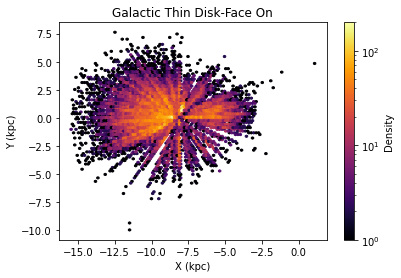

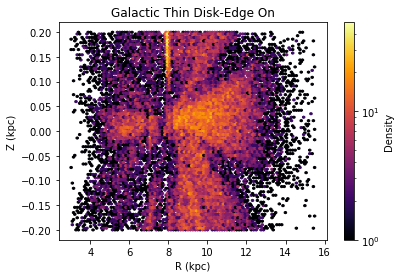

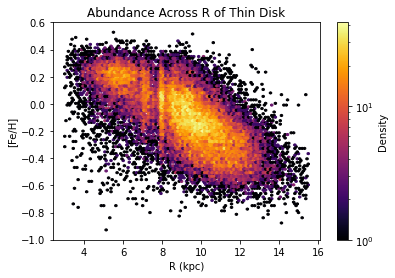

In [27]:
#-------------------------------------------
# galaxy FACE ON
X = thin_disk['X']
Y = thin_disk['Y']

plt.figure()
plt.hexbin(X, Y, bins = 'log', gridsize = 100, cmap = 'inferno', mincnt = 1)
plt.colorbar(label = 'Density')   # logarithmic density of stars
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.title('Galactic Thin Disk-Face On')

plt.show()
#-------------------------------------------
# galaxy EDGE ON
R = thin_disk['R']
Z = thin_disk['Z']

plt.figure()
plt.hexbin(R, Z, bins = 'log', gridsize = 100, cmap = 'inferno', mincnt = 1)
plt.colorbar(label = 'Density')   # logarithmic density of stars
plt.xlabel('R (kpc)')
plt.ylabel('Z (kpc)')
plt.title('Galactic Thin Disk-Edge On')

#plt.ylim(-4,4)     # limits view to only the thin disk of galaxy
plt.show()
#-------------------------------------------
# galaxy RADIAL
R = thin_disk['R']
Fe_H = thin_disk['FE_H']

plt.figure
plt.hexbin(R, Fe_H, bins = 'log', gridsize = 100, cmap = 'inferno', mincnt = 1)
plt.colorbar(label = 'Density')   # logarithmic density of stars
plt.xlabel('R (kpc)')
plt.ylabel('[Fe/H]')
plt.title('Abundance Across R of Thin Disk')

plt.show()

## Adding Metallicity to our plot
* **To do this, we add a "C" parameter to the hexbin plot**
* **If "C" is given in the plot, these values are accumulated in the bins. Otherwise, every point has a value of 1.**
* **In other words, a color representing metallicity is added for each star in a bin**
* **Note: "C" must be of the same length as X and Y.**

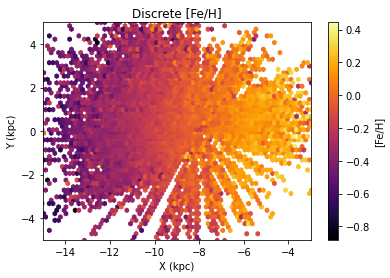

In [28]:
X = thin_disk['X']
Y = thin_disk['Y']

plt.figure()
plt.hexbin(X, Y, C = thin_disk['FE_H'], gridsize = 100, cmap = 'inferno', mincnt = 0)
plt.colorbar(label = '[Fe/H]')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.xlim(-15,-3)
plt.ylim(-5,5)
plt.title('Discrete [Fe/H]')

plt.show()

## Mapping Spiral Arms
* **Code given by Dr. Keith Hawkins, the Univeristy of Texas at Austin**
* **Location of spiral arms are determined using high-mass star forming regions**

In [29]:
def spiral_arms_reid2019(plt=False):
    X = []; Y = []
    Xp = []; Yp = []
    Xm = []; Ym = []
    # --- 3kpc arm
    betaref = 15*pi/180 ; Rref = 3.52 ; width = 0.18; phi = -4.2*pi/180
    beta = arange(15,18,0.1)*pi/180
    R = Rref * exp(-(beta-betaref)*tan(phi))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    # --- Norma arm
    betaref = 18*pi/180 ; Rref = 4.46 ; width = 0.14;
    beta = arange(5,54,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 = -1.0*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 19.5*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)
    
    # --- Sect-Cen arm
    betaref = 23*pi/180 ; Rref = 4.91 ; width = 0.23;
    beta = arange(0,104,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 = 14.1*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 12.1*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)

    # --- Sgr-Car arm
    betaref = 24*pi/180 ; Rref = 6.04 ; width = 0.27;
    beta = arange(2,97,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 = 17.1*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 1.0*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)

    # --- Local
    betaref = 9*pi/180 ; Rref = 8.26 ; width = 0.31;
    beta = arange(-8,34,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 = 11.4*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 11.4*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)

    # --- Perseus
    betaref = 40*pi/180 ; Rref = 8.87 ; width = 0.35;
    beta = arange(-23,115,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 = 10.3*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 8.7*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)

    # --- outer arm
    betaref = 18*pi/180 ; Rref = 12.24 ; width = 0.65;
    beta = arange(-16,71,0.1)*pi/180
    ind1 = where(beta <= betaref )[0] ; phi1 = 3.0*pi/180
    ind2 = where(beta > betaref )[0]; phi2 = 9.4*pi/180
    R = array([nan]*len(beta))
    R[ind1] = Rref * exp(-(beta[ind1]-betaref)*tan(phi1))
    R[ind2] = Rref * exp(-(beta[ind2]-betaref)*tan(phi2))
    X.append(R*cos(beta));Y.append(R*sin(beta))
    Xp.append(R*cos(beta)+width);Yp.append(R*sin(beta)+width)
    Xm.append(R*cos(beta)-width);Ym.append(R*sin(beta)-width)

    X = array(X, dtype=object); Y = array(Y, dtype=object)
    Xp = array(Xp, dtype=object); Yp = array(Yp, dtype=object);
    Xm = array(Xm, dtype=object); Ym = array(Ym, dtype=object);
    XX = -X.T; YY=Y.T
    XXp= -Xp.T; YYp=Yp.T; XXm=-Xm.T; YYm= Ym.T
    if plt:
        for kk in range(len(XX)):
            p.plot(XX[kk],YY[kk],ls='-',color='k',lw=2.5)
            p.plot(XXp[kk],YYp[kk],ls='--',color='k',lw=1.5)
            p.plot(XXm[kk],YYm[kk],ls='--',color='k',lw=1.5)
    return -X.T,Y.T, -Xp.T, Yp.T, -Xm.T, Ym.T

## Overplotting Discrete Metallicity Plot with Spiral Arms Plotting Function

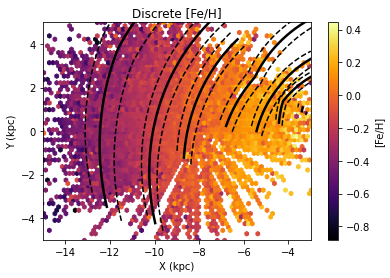

In [30]:
X = thin_disk['X']
Y = thin_disk['Y']

plt.figure()
plt.hexbin(X, Y, C = thin_disk['FE_H'], gridsize = 100, cmap = 'inferno', mincnt = 0)
plt.colorbar(label = '[Fe/H]')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.xlim(-15,-3)
plt.ylim(-5,5)
plt.title('Discrete [Fe/H]')

# call spiral arms plotting fuction over discrete metallicity hexbin plot
spiral_arms_reid2019(plt=True)

plt.show()

## Regular Linear Regression of Metallicity Across Galactic Disk Radially
* **Most galaxies exhibit a [FE_H] gradient radially across their disk**
* **This Regression shows the natural gradient for our Milky Way Galaxy**

C:\Users\MARISS~1\AppData\Local\Temp/ipykernel_40228/435022219.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(thin_disk['R'], linReg(thin_disk['R'], *popt), 'r--', label = "-0.059R + 0.445", c = 'brown')


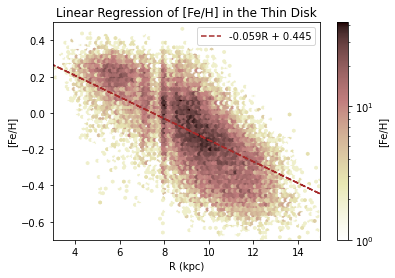

[-0.05944687  0.44485024]


In [31]:
def linReg(x, a, b):
    return a * x + b
    
error = thin_disk['FE_H_ERR']
popt, pcov = curve_fit(linReg, thin_disk['R'], thin_disk['FE_H'], sigma = error) # unsure about last parameter

plt.figure
plt.hexbin(thin_disk['R'], thin_disk['FE_H'], bins = 'log', cmap = 'pink_r', mincnt = 1 )
plt.colorbar(label = '[Fe/H]')
plt.xlabel('R (kpc)')
plt.ylabel('[Fe/H]')
plt.xlim(3,15)
plt.ylim(-0.7,0.5)
plt.title('Linear Regression of [Fe/H] in the Thin Disk')

plt.plot(thin_disk['R'], linReg(thin_disk['R'], *popt), 'r--', label = "-0.059R + 0.445", c = 'brown')
plt.legend()
plt.show()

# popt and pcov are two aspects of the matrix that show the linear relation between Fe_H and R 
# according to the print statement below the thin disk has a metallicity model gradient of -0.059R + 0.445
print(popt)

## Overplotting Continuous (Model) Metallicity Plot with Spiral Arms Plotting Function

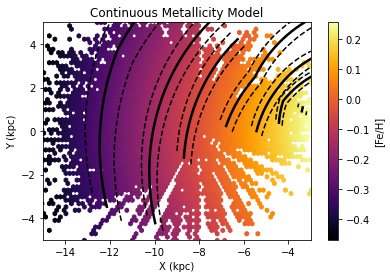

In [32]:
Fe_H_model = -0.05829866 * thin_disk['R'] + 0.43274346

X = thin_disk['X']
Y = thin_disk['Y']

plt.figure()
plt.hexbin(X, Y, C = Fe_H_model, gridsize = 100, cmap = 'inferno', mincnt = 0)
plt.colorbar(label = '[Fe/H]')   # logarithmic density of stars
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.xlim(-15,-3)
plt.ylim(-5,5)
plt.title('Continuous Metallicity Model')

# call spiral arms plotting fuction over metallicity gradient hexbin plot
spiral_arms_reid2019(plt=True)

plt.show()

## Plotting residual metallicity ∆[Fe/H] (Discrete - Model)

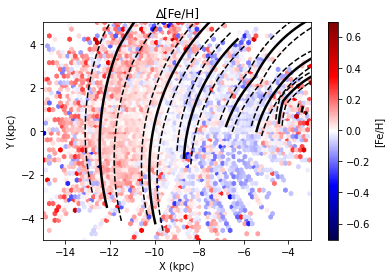

In [33]:
X = thin_disk['X']
Y = thin_disk['Y']

plt.figure()
plt.hexbin(X, Y, C = Fe_H_model - thin_disk['FE_H'], gridsize = 100, cmap = 'seismic', mincnt = 0)
plt.colorbar(label = '[Fe/H]')   # logarithmic density of stars
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.xlim(-15,-3)
plt.ylim(-5,5)
plt.title('∆[Fe/H]')

# call spiral arms plotting fuction over metallicity gradient hexbin plot
spiral_arms_reid2019(plt=True)

plt.show()

# Some Notes From this Project
* **The linear regression relationship isn't direct. It varies based on what azimuthal angle we are looking at the galaxy. Therefore there must be descrepencies among the spiral arm regions.**
* **In other words, the regression isn't decreasing evenly**

# Conclusions Drawn
* **Subtracting the observed metallicity of a star from its predicted metallicity given by our gradient model, we end up with its ∆[Fe/H]. For this sample from APOGEE, we find the residuals do not follow the expected location of the spiral arms.**
* **Interestingly, we are left with a slight residual gradient, with negative residuals (blue) indicating our data had more metallicity than our model, and vice versa. This suggests there could be a better fitting gradient model for our sample.** 
* **In comparison, Hawkins 2022 used a Bayesian inference linear regression and found his Gaia DR3 sample showed a spiral structure in ∆[Fe/H], but his LAMOST sample did not. This indicates there is more work to be done with azimuthal chemical structures in future studies in order to refine our chemical map of the Milky Way Galaxy.**